In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/fabiorolim/data_science_suicidio/master/master.csv")

In [ ]:
df.shape

In [ ]:
df_brasil = df[df.country == 'Brazil'].copy()

In [ ]:
df_brasil.head()

In [ ]:
# Dados nulos no dataframe do Brasil
print('valores nulos no Brasil')
display(df_brasil.isnull().sum())

In [203]:
# Dados nulos no dataframe mundial
print("Valores nulos no mundo")
display(df.isnull().sum())

Valores nulos no mundo


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [204]:
# Dados de 101 países
len(df.country.unique())

101

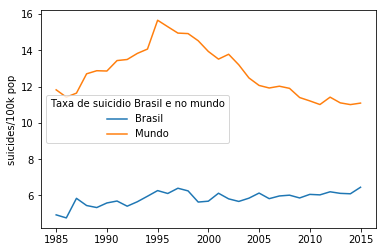

In [205]:
# média mundial e do Brasil
anos = df_brasil.year.unique()
media_brasil = df_brasil.groupby('year')['suicides/100k pop'].mean()
media_mundial = df.groupby('year')['suicides/100k pop'].mean()

# Eliminando o ano de 2016 devido ausencia desses dados no Brasil
media_mundial.drop(2016, inplace=True)

# Plotar
ax = sns.lineplot(x=anos, y=media_brasil, label='Brasil')
ax = sns.lineplot(x=anos, y=media_mundial, label='Mundo')
plt.legend(title='Taxa de suicidio Brasil e no mundo')
plt.show()

In [206]:
# Cria tabela com número de casos de suicídio no Brasil por ano e faixa etária
tabela = pd.pivot_table(df_brasil, values='suicides_no', index=['year'], columns=['age'])

# Ordenar por faixa etária
ordem = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
tabela = tabela.reindex(ordem, axis=1)

tabela.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,38.0,470.5,530.0,653.5,341.5,80.5
1986,31.0,508.0,505.5,651.0,372.0,68.0
1987,33.5,502.0,565.5,724.5,422.0,88.5
1988,30.0,472.0,557.5,724.0,356.0,93.5
1989,31.5,491.5,569.0,692.5,354.5,92.5


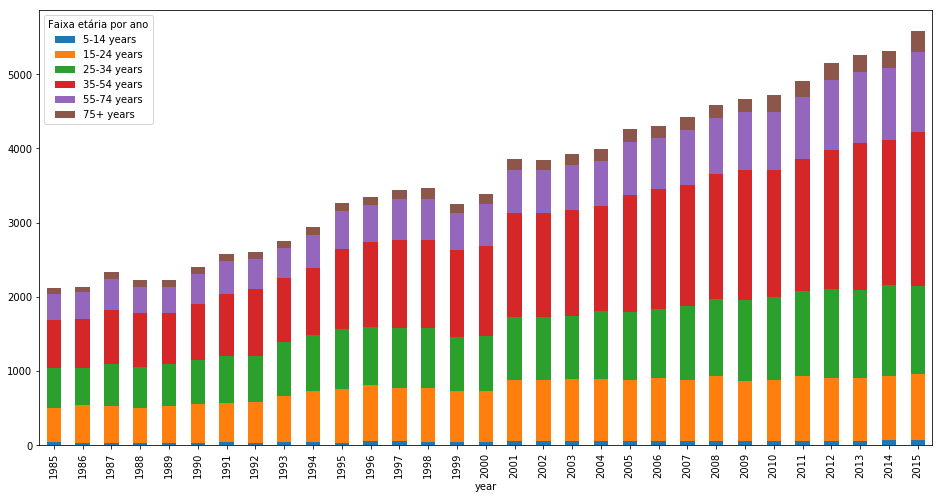

In [207]:
# Plot número de suicidios por faixa etária e ano no Brasil
tabela.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title='Faixa etária por ano')

([<matplotlib.patches.Wedge at 0x1a27ea8898>,
 [Text(0.855671,0.691251,'mulheres'), Text(-0.855671,-0.691251,'homens')],
 [Text(0.466729,0.377046,'21.6%'), Text(-0.46673,-0.377046,'78.4%')])

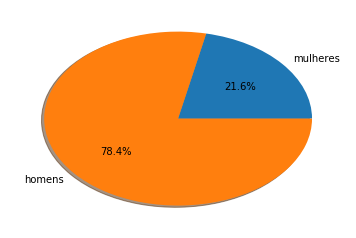

In [208]:
# Calcular o percentual de casos entre os sexos no Brasil

homens_mulheres_brasil = df_brasil.groupby('sex').suicides_no.sum() / df_brasil.groupby('sex').suicides_no.sum().sum()

# Plot

plt.pie(homens_mulheres_brasil, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True)

([<matplotlib.patches.Wedge at 0x1a285c15c0>,
 [Text(0.82262,0.730271,'mulheres'), Text(-0.82262,-0.730271,'homens')],
 [Text(0.448702,0.39833,'23.1%'), Text(-0.448702,-0.39833,'76.9%')])

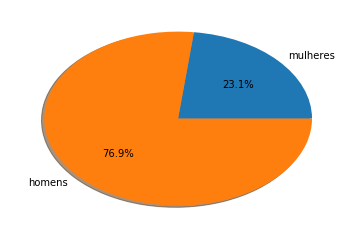

In [211]:
# Calcular o percentual de casos entre os sexos no mundo

homens_mulheres_mundo = df.groupby('sex').suicides_no.sum() / df.groupby('sex').suicides_no.sum().sum()

# Plot

plt.pie(homens_mulheres_mundo, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True)

,suicides_no
country,
Russian Federation,1209742
United States,1034013
Japan,806902
France,329127
Ukraine,319950
Germany,291262
Republic of Korea,261730
Brazil,226613
Poland,139098


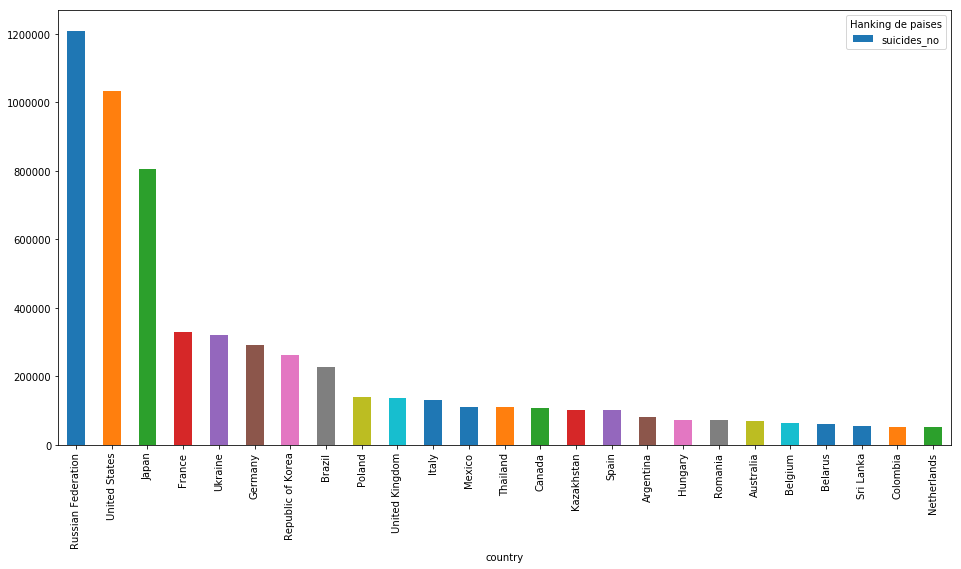

In [209]:
# Agrupa gerando total de casos por país
total_mundial = df.groupby('country').suicides_no.sum()

# Ordena de forma decrescente por número de casos e filtra o 25 primeiros
total_mundial_ordenado = total_mundial.sort_values(ascending=False)[:25]
df_tm = total_mundial_ordenado.to_frame()
# tabela_mundial = pd.pivot_table(df_tm, values='suicides_no', index=['country'])
# tabela_mundial.head()

# Plotar 
total_mundial_ordenado.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title='Hanking de paises')
df_tm

suicides_no
country            age                     
Russian Federation 35-54 years       479140
United States      35-54 years       380917
Japan              35-54 years       278679
                   55-74 years       272705
Russian Federation 55-74 years       267753
                   25-34 years       231187
United States      55-74 years       224770
                   25-34 years       182047
Russian Federation 15-24 years       148611
United States      15-24 years       141679
Ukraine            35-54 years       124721
France             35-54 years       123510
Japan              75+ years         106571
Germany            35-54 years        97833
Republic of Korea  35-54 years        96292
United States      75+ years          95677
Japan              25-34 years        94529
Ukraine            55-74 years        90385
Germany            55-74 years        89191
France             55-74 years        86509
Brazil             35-54 years        79860
Russian Federation 75+ years          74211
Republic of Korea  55-74 years        68574
Poland             35-54 years        60061
France             75+ years          55872

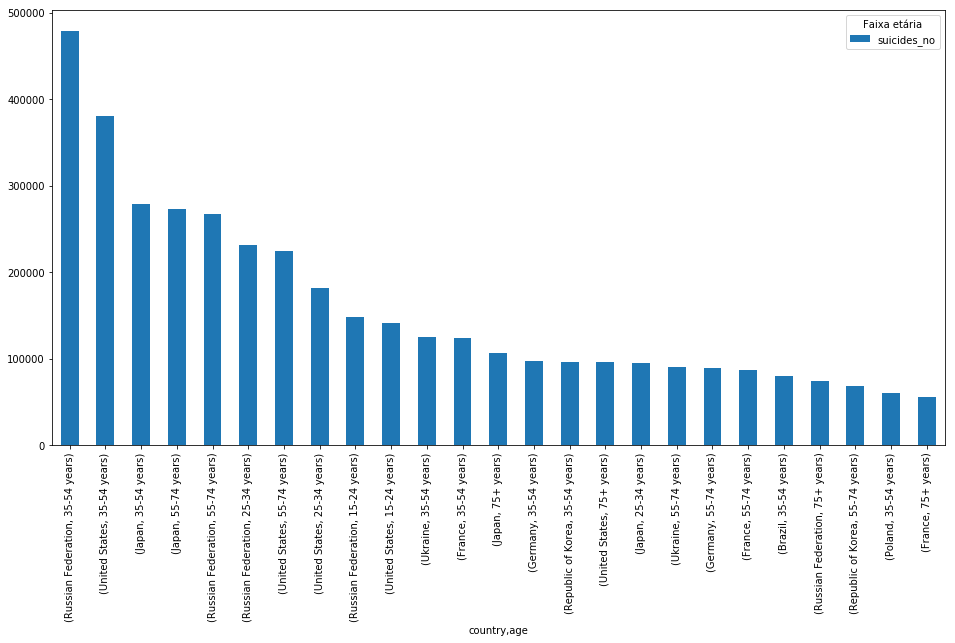

In [210]:
# Agrupa e gera o total por pais e faixa etaria
total_mundial_idade = df.groupby(['country', 'age']).suicides_no.sum()
df_tmi = total_mundial_idade.to_frame()

# Ordena de forma decrescente
df_tmi = df_tmi.sort_values(ascending=False, by='suicides_no')

# Limita aos 25 primeiros
df_tmi = df_tmi[:25]


# Plotar 
df_tmi.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title='Faixa etária')
df_tmi
